### IMPORT LIBRARY

In [758]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### LOAD DATASET

In [759]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


### EXPLORATORY DATA ANALYSIS

In [760]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [761]:
data.duplicated().sum()

0

In [762]:
data.shape

(768, 9)

In [763]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [764]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Di kolom Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, dan BMI terdapat nilai minimum yaitu 0, dalam pregnancies mungkin masih bisa diterima kalau ada nilai 0 karena jenis kelamin laki-laki tidak mengalami kehamilan maka bisa mengisi nilai 0, tapi dikolom Glucose, BloodPressure, SkinThickness, Insulin, dan BMI nilai 0 bisa diasumsikan kalau user tidak menginput nilai. Maka kita mengisi variabel tersebut ( kecuali Pregnancies ) dengan nilai rata-rata agar ketika pembuatan model dapat maksimal akurasinya.

In [765]:
col=['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']

for i in col:
    data[i].replace(0, data[i].mean(), inplace=True)
    
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,79.80,33.60,0.63,50,1
1,1,85.00,66.00,29.00,79.80,26.60,0.35,31,0
2,8,183.00,64.00,20.54,79.80,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


In [766]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.68,72.25,26.61,118.66,32.45,0.47,33.24,0.35
std,3.37,30.44,12.12,9.63,93.08,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,20.54,79.80,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,79.80,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [767]:
# Menghitum jumlah nilai dikolom Outcome
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

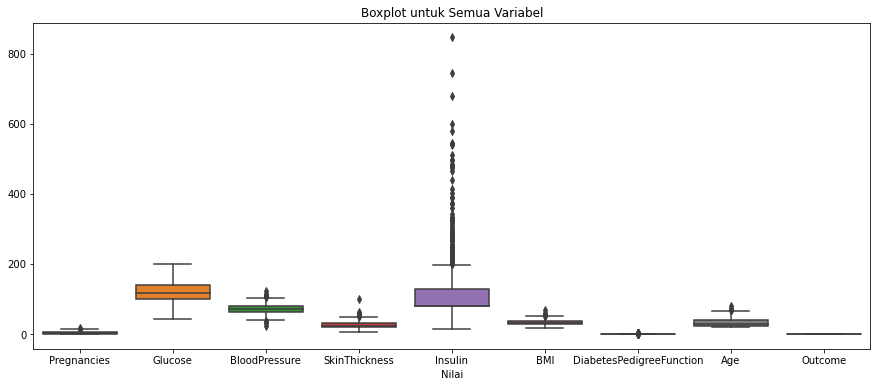

In [768]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, orient='v')
plt.title('Boxplot untuk Semua Variabel')
plt.xlabel('Nilai')
plt.show()

In [769]:
def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Menghitung jumlah outlier
    outliers = (column_data < lower_bound) | (column_data > upper_bound)
    
    return np.sum(outliers)

# Menghitung jumlah outlier untuk setiap variabel
data_outliers = data.apply(count_outliers)

print("Jumlah outlier untuk setiap variabel:")
print(data_outliers)

Jumlah outlier untuk setiap variabel:
Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness               12
Insulin                     89
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


### PREPROCESSING

In [770]:
# Fungsi untuk menangani outlier dengan truncation
def handle_outliers_truncation(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Mengganti nilai outlier dengan batas atas dan bawah
    column_data[column_data < lower_bound] = lower_bound
    column_data[column_data > upper_bound] = upper_bound
    
    return column_data

# Menangani outlier dengan truncation
data_truncated = handle_outliers_truncation(data)

print("Data setelah penanganan outlier dengan truncation:")
data_truncated

Data setelah penanganan outlier dengan truncation:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,79.80,33.60,0.63,50,1
1,1,85.00,66.00,29.00,79.80,26.60,0.35,31,0
2,8,183.00,64.00,20.54,79.80,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.00,76.00,48.00,180.00,32.90,0.17,63,0
764,2,122.00,70.00,27.00,79.80,36.80,0.34,27,0
765,5,121.00,72.00,23.00,112.00,26.20,0.24,30,0
766,1,126.00,60.00,20.54,79.80,30.10,0.35,47,1


In [771]:
data_truncated.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

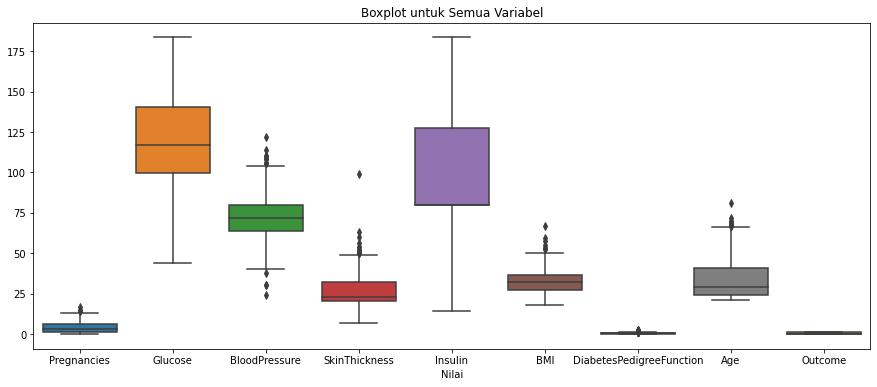

In [772]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data_truncated, orient='v')
plt.title('Boxplot untuk Semua Variabel')
plt.xlabel('Nilai')
plt.show()

In [773]:
# Menghitung jumlah outlier untuk setiap variabel
def detect_outliers(column):
    # Your outlier detection logic here
    # For example, using Z-score
    z_scores = (column - column.mean()) / column.std()
    return z_scores.abs() > 2  # Adjust the threshold as needed

# Apply the outlier detection function to each column
data_outliers = data_truncated.apply(detect_outliers)

# Display the result
print("Outliers for each variable:")
print(data_outliers.sum())

Outliers for each variable:
Pregnancies                 34
Glucose                     46
BloodPressure               35
SkinThickness               33
Insulin                      2
BMI                         25
DiabetesPedigreeFunction    39
Age                         47
Outcome                      0
dtype: int64


In [774]:
# Apply the outlier detection function to each column
outliers_mask = data.apply(detect_outliers)

# Invert the mask to get a mask of non-outliers
non_outliers_mask = ~outliers_mask

# Filter the DataFrame to keep only non-outliers
data_without_outliers = data[non_outliers_mask.all(axis=1)]

# Display the result
print("Data without outliers:")
print(data_without_outliers)

Data without outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6   148.00          72.00          35.00    79.80 33.60   
1              1    85.00          66.00          29.00    79.80 26.60   
3              1    89.00          66.00          23.00    94.00 28.10   
5              5   116.00          74.00          20.54    79.80 25.60   
6              3    78.00          50.00          32.00    88.00 31.00   
..           ...      ...            ...            ...      ...   ...   
762            9    89.00          62.00          20.54    79.80 22.50   
764            2   122.00          70.00          27.00    79.80 36.80   
765            5   121.00          72.00          23.00   112.00 26.20   
766            1   126.00          60.00          20.54    79.80 30.10   
767            1    93.00          70.00          31.00    79.80 30.40   

     DiabetesPedigreeFunction  Age  Outcome  
0                        0.63   50        

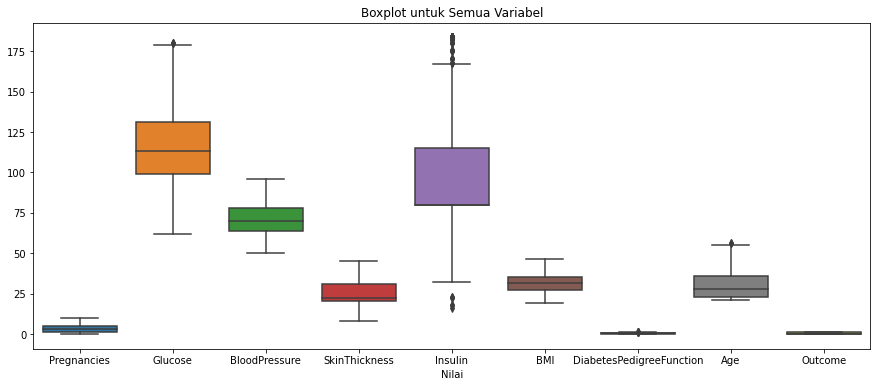

In [775]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data_without_outliers, orient='v')
plt.title('Boxplot untuk Semua Variabel')
plt.xlabel('Nilai')
plt.show()

In [776]:
data_without_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,79.80,33.60,0.63,50,1
1,1,85.00,66.00,29.00,79.80,26.60,0.35,31,0
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
5,5,116.00,74.00,20.54,79.80,25.60,0.20,30,0
6,3,78.00,50.00,32.00,88.00,31.00,0.25,26,1
...,...,...,...,...,...,...,...,...,...
762,9,89.00,62.00,20.54,79.80,22.50,0.14,33,0
764,2,122.00,70.00,27.00,79.80,36.80,0.34,27,0
765,5,121.00,72.00,23.00,112.00,26.20,0.24,30,0
766,1,126.00,60.00,20.54,79.80,30.10,0.35,47,1


In [777]:
# Importing
import numpy as np
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Q1 = data_without_outliers[features].quantile(0.25)
Q3 = data_without_outliers[features].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Create boolean masks for outlier rows
upper_mask = (data_without_outliers[features] >= upper)
lower_mask = (data_without_outliers[features] <= lower)

# Combine masks to identify outliers in any feature
outliers_mask = upper_mask | lower_mask

# Remove the outliers
data_without_outliers = data_without_outliers[~outliers_mask]

# Print the new shape of the DataFrame
print("New Shape: ", data_without_outliers.shape)

New Shape:  (561, 9)


In [778]:
data_without_outliers.isnull().sum()

Pregnancies                  0
Glucose                      7
BloodPressure                0
SkinThickness                0
Insulin                     84
BMI                          0
DiabetesPedigreeFunction     7
Age                          2
Outcome                      0
dtype: int64

In [779]:
data_without_outliers.dropna(inplace=True)

In [780]:
data_without_outliers.shape

(463, 9)

In [781]:
data_without_outliers.duplicated().sum()

0

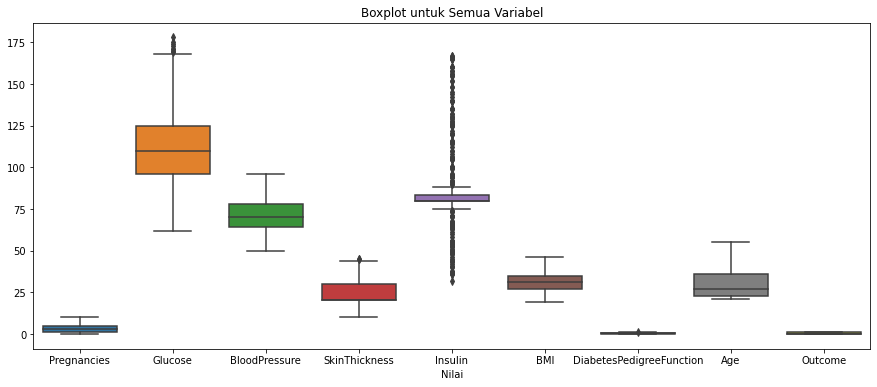

In [782]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data_without_outliers, orient='v')
plt.title('Boxplot untuk Semua Variabel')
plt.xlabel('Nilai')
plt.show()

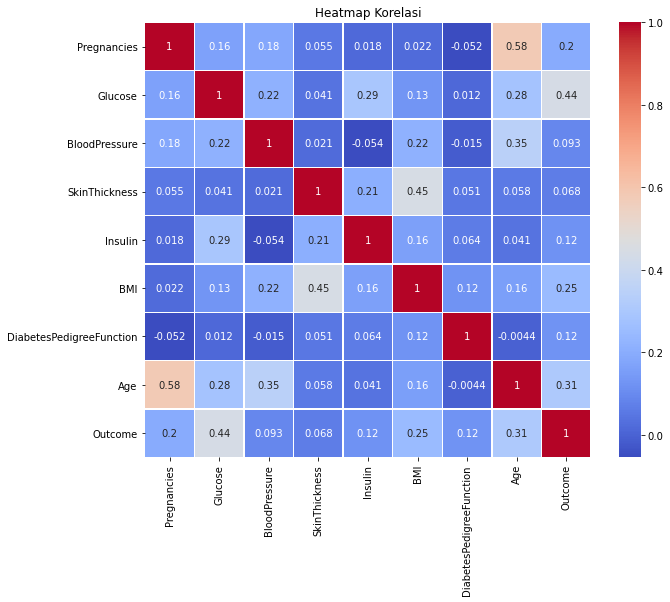

In [783]:
# Menghitung matriks korelasi
correlation_matrix = data_without_outliers.corr(method='spearman')

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()

In [784]:
# Menghitung korelasi Spearman
spearman_corr = data_without_outliers.corr(method='spearman')['Outcome']

# Membuat DataFrame untuk hasil korelasi
feature_ranking = pd.DataFrame({'Feature': spearman_corr.index, 'SpearmanCorrelation': spearman_corr.abs()})
feature_ranking = feature_ranking.sort_values(by='SpearmanCorrelation', ascending=False)

# Menampilkan hasil ranking
print("Feature Ranking Based on Spearman Correlation:")
print(feature_ranking)

Feature Ranking Based on Spearman Correlation:
                                           Feature  SpearmanCorrelation
Outcome                                    Outcome                 1.00
Glucose                                    Glucose                 0.44
Age                                            Age                 0.31
BMI                                            BMI                 0.25
Pregnancies                            Pregnancies                 0.20
DiabetesPedigreeFunction  DiabetesPedigreeFunction                 0.12
Insulin                                    Insulin                 0.12
BloodPressure                        BloodPressure                 0.09
SkinThickness                        SkinThickness                 0.07


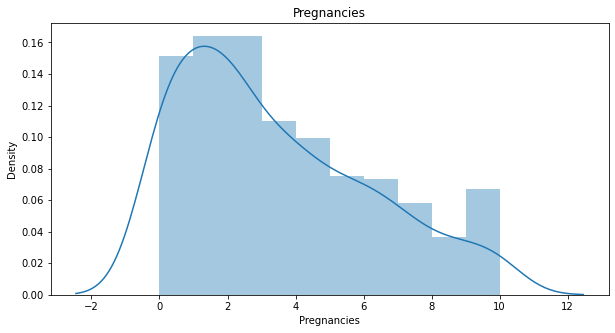

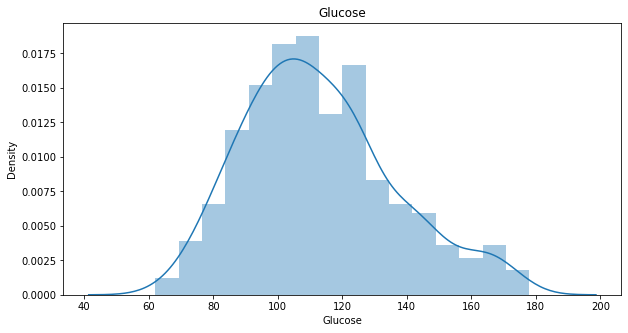

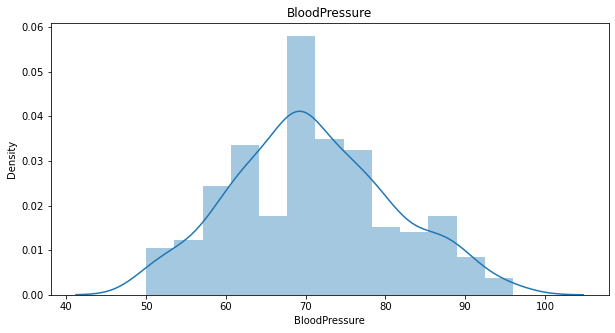

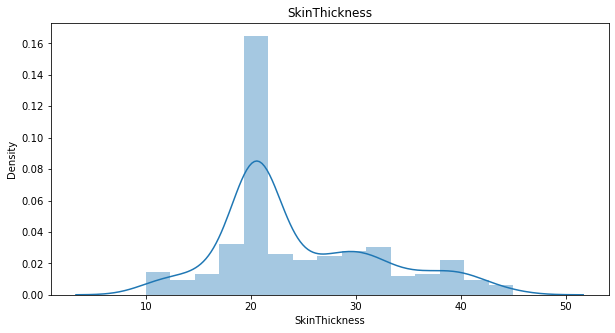

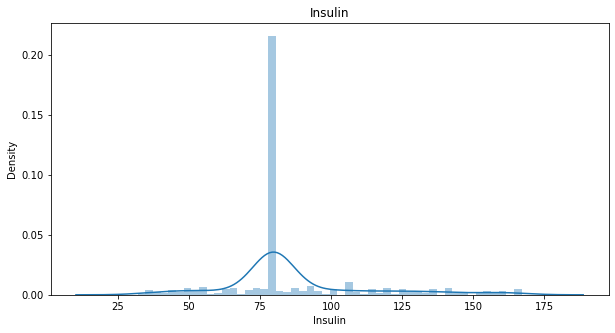

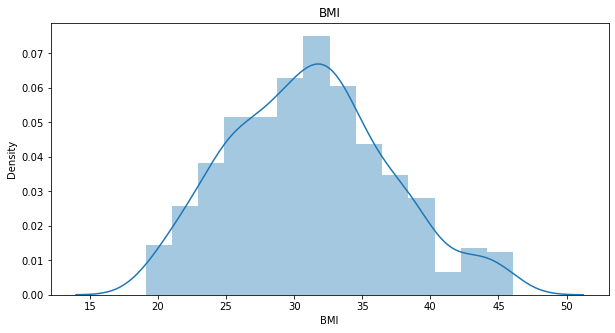

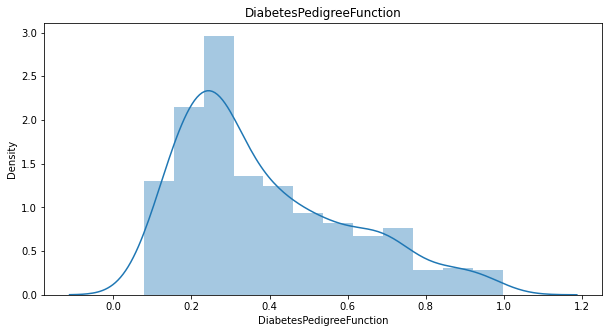

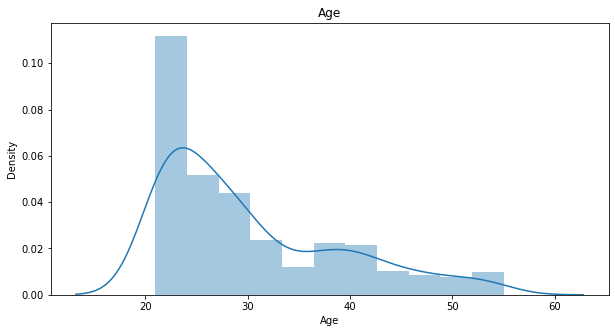

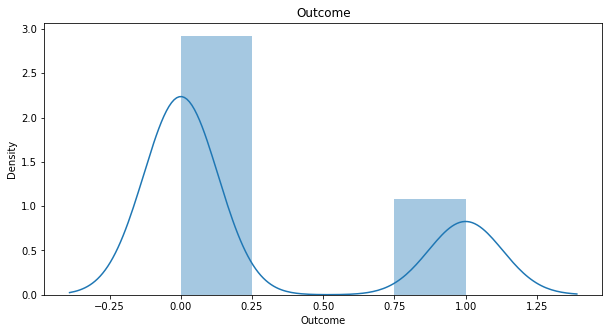

In [785]:
# Plot the distribution of each variable
for col in data_without_outliers.columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(data_without_outliers[col])
    plt.title(col)
    plt.show()

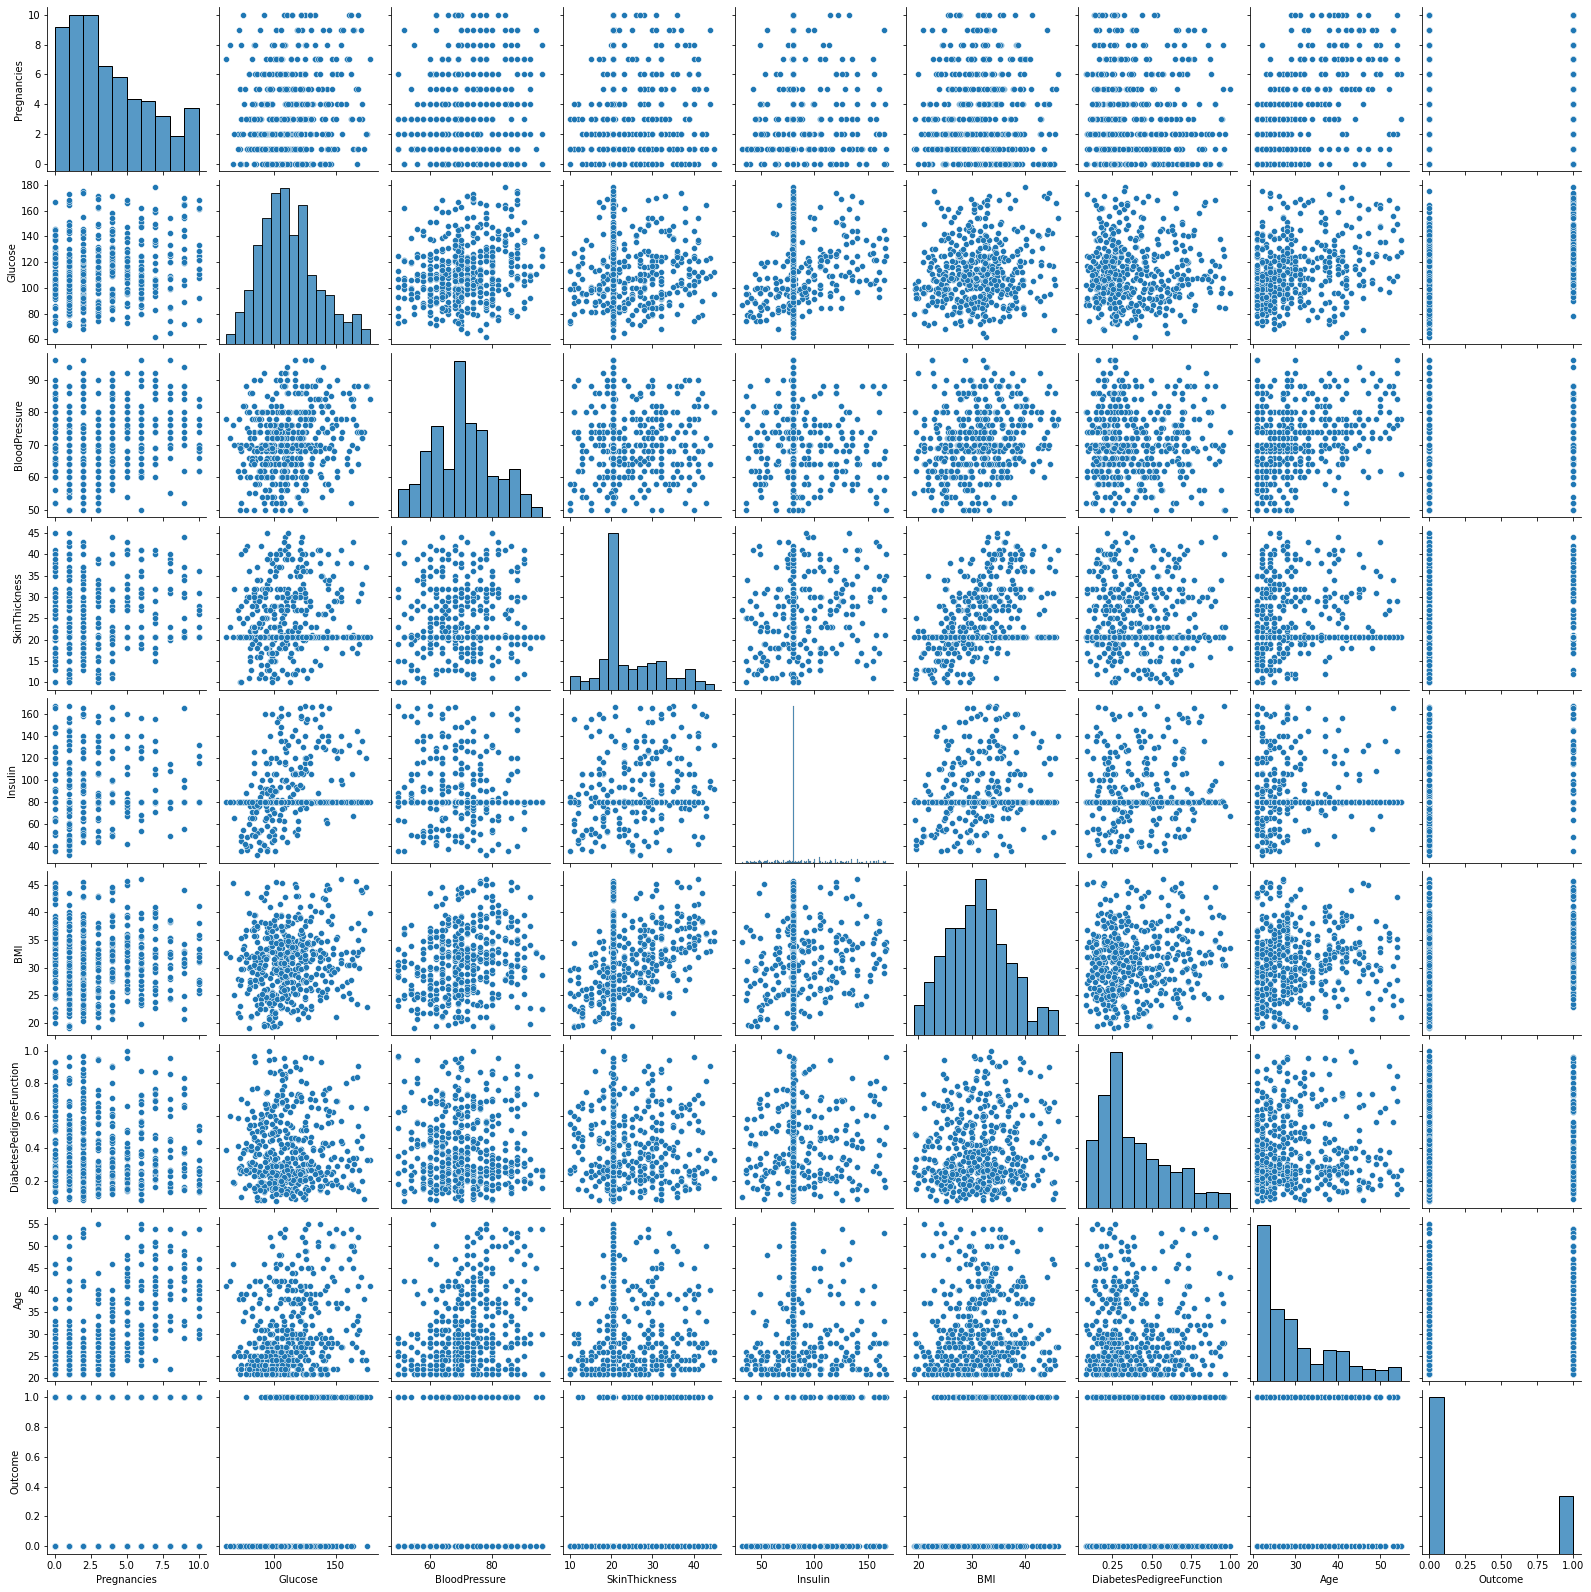

In [786]:
# Plot the multivariate relationship between variables
sns.pairplot(data_without_outliers)
plt.show()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

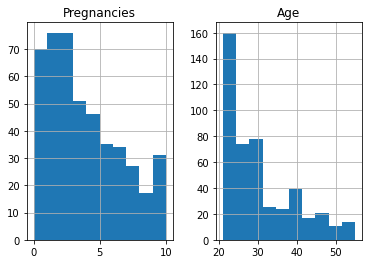

In [787]:
# Check the distribution of the data
data_without_outliers[['Pregnancies', 'Age']].hist()

In [788]:
# Memisahkan data dan label
X = data_without_outliers.drop(columns=['Pregnancies', 'Outcome','BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'], axis=1)
y = data_without_outliers['Outcome']

In [789]:
X

,Glucose,BMI,Age
0,148.00,33.60,50.00
1,85.00,26.60,31.00
3,89.00,28.10,21.00
5,116.00,25.60,30.00
6,78.00,31.00,26.00
...,...,...,...
762,89.00,22.50,33.00
764,122.00,36.80,27.00
765,121.00,26.20,30.00
766,126.00,30.10,47.00


In [790]:
y

0      1
1      0
3      0
5      0
6      1
      ..
762    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 463, dtype: int64

In [791]:
y.value_counts()

0    338
1    125
Name: Outcome, dtype: int64

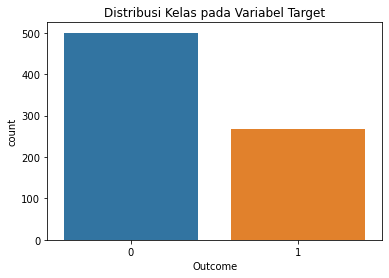

In [792]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data_truncated)
plt.title('Distribusi Kelas pada Variabel Target')
plt.show()

<AxesSubplot:ylabel='Outcome'>

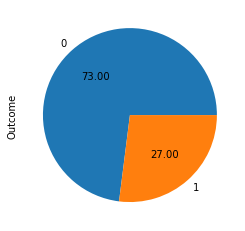

In [793]:
y.value_counts().plot.pie(autopct='%.2f')

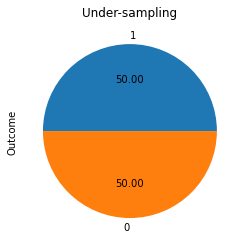

In [794]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_res, y_res = rus.fit_resample(X, y)

# Visualization
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [795]:
y_res.value_counts()

1    125
0    125
Name: Outcome, dtype: int64

In [796]:
# Standarisasi data
scaler = StandardScaler()
scaler.fit(X_res)
X = scaler.transform(X_res)
X

array([[-1.27092934, -1.76477759, -1.1234046 ],
       [-1.35197535, -1.31749066,  1.13113445],
       [ 1.76829604, -0.74978032,  2.41944247],
       [-0.09576219, -0.99062713, -0.80132759],
       [-0.70360727, -1.90240434, -1.1234046 ],
       [-0.54151525,  0.48886043, -0.69396859],
       [ 0.18789884,  0.35123368, -0.37189158],
       [ 0.06632983, -0.90461041, -0.47925059],
       [ 0.10685283,  1.21140086, -0.90868659],
       [-0.54151525,  1.62428111, -1.0160456 ],
       [-1.39249835,  0.88453733, -0.37189158],
       [-0.50099224,  1.26301089, -1.0160456 ],
       [-0.46046924, -0.97342378, -0.90868659],
       [ 0.75522091, -0.14766329, -0.15717358],
       [ 0.75522091,  0.19640359, -1.0160456 ],
       [-1.10883732, -1.17986391, -0.90868659],
       [ 0.75522091, -0.01003654,  0.80905744],
       [-0.09576219, -1.71316756,  0.59433944],
       [-0.78465328, -0.52613685,  0.05754443],
       [ 0.30946786, -1.0594405 ,  0.80905744],
       [-0.9467453 ,  0.76411393, -0.586

In [797]:
X_train, X_test, y_res_train, y_res_test = train_test_split(X, y_res, test_size= 0.2, stratify = y_res, random_state= 0)

In [798]:
print(X.shape, X_train.shape, X_test.shape)

(250, 3) (200, 3) (50, 3)


In [799]:
from lazypredict.Supervised import LazyClassifier

# Use LazyClassifier
clf = LazyClassifier(verbose=0)
models, predictions = clf.fit(X_train, X_test, y_res_train, y_res_test)

# Print the models and their performance
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.97it/s]

[LightGBM] [Info] Number of positive: 100, number of negative: 100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

### MODELLING


Results for SVM:
Best hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy on training data: 74.00%
Accuracy on testing data: 84.00%

Confusion Matrix (Training Data) - SVM:
[[69 31]
 [21 79]]

Confusion Matrix (Testing Data) - SVM:
[[23  2]
 [ 6 19]]

Classification Report (Training Data) - SVM:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       100
           1       0.72      0.79      0.75       100

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200


Classification Report (Testing Data) - SVM:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        25
           1       0.90      0.76      0.83        25

    accuracy                           0.84        50
   macro avg       0.85      0.84      0.84        50
weighted avg       0.85      0.84      0.84 

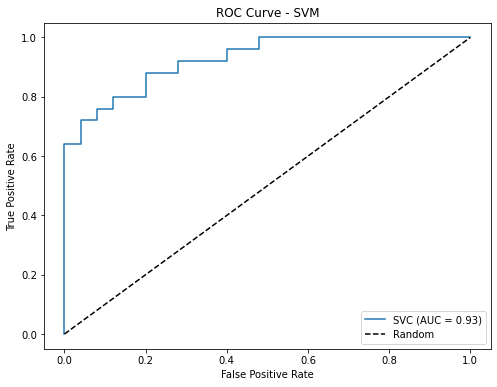


Results for SVC:
AUC-ROC on testing data: 0.93


In [800]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'kernel': ['rbf']}
svm_model = SVC(kernel='rbf', probability=True)
grid_search = GridSearchCV(svm_model, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_res_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Retrain SVM model with best hyperparameters
svm_model_best = SVC(**best_params, probability=True)
svm_model_best.fit(X_train, y_res_train)

# Predictions on training data for SVM
y_train_pred_svm = svm_model_best.predict(X_train)

# Predictions on testing data for SVM
y_test_pred_svm = svm_model_best.predict(X_test)

# Accuracy calculation for SVM
train_accuracy_svm = accuracy_score(y_res_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_res_test, y_test_pred_svm)

# Confusion matrix for training data for SVM
conf_matrix_train_svm = confusion_matrix(y_res_train, y_train_pred_svm)

# Classification report for training data for SVM
class_report_train_svm = classification_report(y_res_train, y_train_pred_svm)

# Confusion matrix for testing data for SVM
conf_matrix_test_svm = confusion_matrix(y_res_test, y_test_pred_svm)

# Classification report for testing data for SVM
class_report_test_svm = classification_report(y_res_test, y_test_pred_svm)

# Print results for SVM
print("\nResults for SVM:")
print(f"Best hyperparameters: {best_params}")
print(f"Accuracy on training data: {train_accuracy_svm:.2%}")
print(f"Accuracy on testing data: {test_accuracy_svm:.2%}")

print("\nConfusion Matrix (Training Data) - SVM:")
print(conf_matrix_train_svm)

print("\nConfusion Matrix (Testing Data) - SVM:")
print(conf_matrix_test_svm)

# Print Classification report for training data for SVM
print("\nClassification Report (Training Data) - SVM:")
print(class_report_train_svm)

# Print Classification report for testing data for SVM
print("\nClassification Report (Testing Data) - SVM:")
print(class_report_test_svm)

# Plot ROC curve for testing data
y_test_pred_prob = svm_model_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_res_test, y_test_pred_prob)
roc_auc_test = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

# Print AUC-ROC results
print("\nResults for SVC:")
print(f"AUC-ROC on testing data: {roc_auc_test:.2f}")


Results for Logistic Regression:
Best hyperparameters: {'C': 0.01}
Accuracy on training data: 71.00%
Accuracy on testing data: 84.00%

Confusion Matrix (Training Data) - Logistic Regression:
[[72 28]
 [30 70]]

Confusion Matrix (Testing Data) - Logistic Regression:
[[24  1]
 [ 7 18]]

Classification Report (Training Data) - Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       100
           1       0.71      0.70      0.71       100

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200


Classification Report (Testing Data) - Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.95      0.72      0.82        25

    accuracy                           0.84        50
   macro avg       0.86      0.84      0.84   

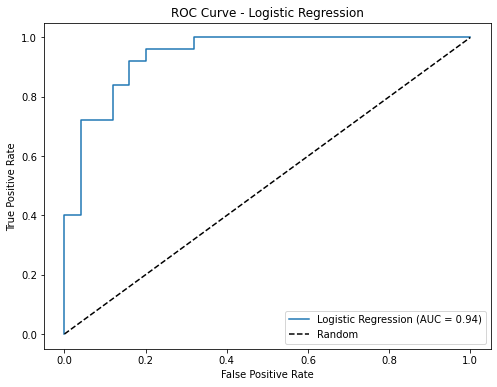


Results for Logistic Regression:
AUC-ROC on testing data: 0.94


In [801]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logreg_model, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_res_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Retrain Logistic Regression model with best hyperparameters
logreg_model_best = LogisticRegression(**best_params,max_iter=1000)
logreg_model_best.fit(X_train, y_res_train)

# Predictions on training data for Logistic Regression
y_train_pred_logreg = logreg_model_best.predict(X_train)

# Predictions on testing data for Logistic Regression
y_test_pred_logreg = logreg_model_best.predict(X_test)

# Accuracy calculation for Logistic Regression
train_accuracy_logreg = accuracy_score(y_res_train, y_train_pred_logreg)
test_accuracy_logreg = accuracy_score(y_res_test, y_test_pred_logreg)

# Confusion matrix for training data for Logistic Regression
conf_matrix_train_logreg = confusion_matrix(y_res_train, y_train_pred_logreg)

# Classification report for training data for Logistic Regression
class_report_train_logreg = classification_report(y_res_train, y_train_pred_logreg)

# Confusion matrix for testing data for Logistic Regression
conf_matrix_test_logreg = confusion_matrix(y_res_test, y_test_pred_logreg)

# Classification report for testing data for Logistic Regression
class_report_test_logreg = classification_report(y_res_test, y_test_pred_logreg)

# Print results for Logistic Regression
print("\nResults for Logistic Regression:")
print(f"Best hyperparameters: {best_params}")
print(f"Accuracy on training data: {train_accuracy_logreg:.2%}")
print(f"Accuracy on testing data: {test_accuracy_logreg:.2%}")

print("\nConfusion Matrix (Training Data) - Logistic Regression:")
print(conf_matrix_train_logreg)

print("\nConfusion Matrix (Testing Data) - Logistic Regression:")
print(conf_matrix_test_logreg)

# Print Classification report for training data for Logistic Regression
print("\nClassification Report (Training Data) - Logistic Regression:")
print(class_report_train_logreg)

# Print Classification report for testing data for Logistic Regression
print("\nClassification Report (Testing Data) - Logistic Regression:")
print(class_report_test_logreg)

# Plot ROC curve for testing data
y_test_pred_prob_logreg = logreg_model_best.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_res_test, y_test_pred_prob_logreg)
roc_auc_test_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_test_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Print AUC-ROC results
print("\nResults for Logistic Regression:")
print(f"AUC-ROC on testing data: {roc_auc_test_logreg:.2f}")


Results for GaussianNB:
Best hyperparameters: {'var_smoothing': 1e-09}
Accuracy on training data: 70.50%
Accuracy on testing data: 84.00%

Confusion Matrix (Training Data) - GaussianNB:
[[71 29]
 [30 70]]

Confusion Matrix (Testing Data) - GaussianNB:
[[24  1]
 [ 7 18]]

Classification Report (Training Data) - GaussianNB:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       100
           1       0.71      0.70      0.70       100

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200


Classification Report (Testing Data) - GaussianNB:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.95      0.72      0.82        25

    accuracy                           0.84        50
   macro avg       0.86      0.84      0.84        50
weighted avg       0.86 

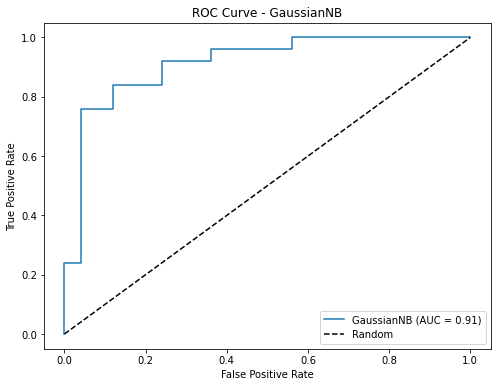


Results for GaussianNB:
AUC-ROC on testing data: 0.91


In [804]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Assuming X_train_resampled, y_train_resampled, X_test, y_test are defined

# Hyperparameter tuning using GridSearchCV
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
gnb_model = GaussianNB()
grid_search = GridSearchCV(gnb_model, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_res_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Retrain GaussianNB model with best hyperparameters
gnb_model_best = GaussianNB(**best_params)
gnb_model_best.fit(X_train, y_res_train)

# Predictions on training data for GaussianNB
y_train_pred_gnb = gnb_model_best.predict(X_train)

# Predictions on testing data for GaussianNB
y_test_pred_gnb = gnb_model_best.predict(X_test)

# Accuracy calculation for GaussianNB
train_accuracy_gnb = accuracy_score(y_res_train, y_train_pred_gnb)
test_accuracy_gnb = accuracy_score(y_res_test, y_test_pred_gnb)

# Confusion matrix for training data for GaussianNB
conf_matrix_train_gnb = confusion_matrix(y_res_train, y_train_pred_gnb)

# Classification report for training data for GaussianNB
class_report_train_gnb = classification_report(y_res_train, y_train_pred_gnb)

# Confusion matrix for testing data for GaussianNB
conf_matrix_test_gnb = confusion_matrix(y_res_test, y_test_pred_gnb)

# Classification report for testing data for GaussianNB
class_report_test_gnb = classification_report(y_res_test, y_test_pred_gnb)

# Print results for GaussianNB
print("\nResults for GaussianNB:")
print(f"Best hyperparameters: {best_params}")
print(f"Accuracy on training data: {train_accuracy_gnb:.2%}")
print(f"Accuracy on testing data: {test_accuracy_gnb:.2%}")

print("\nConfusion Matrix (Training Data) - GaussianNB:")
print(conf_matrix_train_gnb)

print("\nConfusion Matrix (Testing Data) - GaussianNB:")
print(conf_matrix_test_gnb)

# Print Classification report for training data for GaussianNB
print("\nClassification Report (Training Data) - GaussianNB:")
print(class_report_train_gnb)

# Print Classification report for testing data for GaussianNB
print("\nClassification Report (Testing Data) - GaussianNB:")
print(class_report_test_gnb)

# Plot ROC curve for testing data
y_test_pred_prob_gnb = gnb_model_best.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_res_test, y_test_pred_prob_gnb)
roc_auc_test_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f'GaussianNB (AUC = {roc_auc_test_gnb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GaussianNB')
plt.legend(loc='lower right')
plt.show()

# Print AUC-ROC results
print("\nResults for GaussianNB:")
print(f"AUC-ROC on testing data: {roc_auc_test_gnb:.2f}")


Results for Ensemble Model:
Accuracy on validation data: 84.00%

Confusion Matrix (Validation Data) - Ensemble Model:
[[24  1]
 [ 7 18]]

Classification Report (Validation Data) - Ensemble Model:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.95      0.72      0.82        25

    accuracy                           0.84        50
   macro avg       0.86      0.84      0.84        50
weighted avg       0.86      0.84      0.84        50


Results for Ensemble Model on Testing Data:
Accuracy on testing data: 84.00%

Confusion Matrix (Testing Data) - Ensemble Model:
[[24  1]
 [ 7 18]]

Classification Report (Testing Data) - Ensemble Model:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.95      0.72      0.82        25

    accuracy                           0.84        50
   macro avg       0.86      0.84      0.84        50


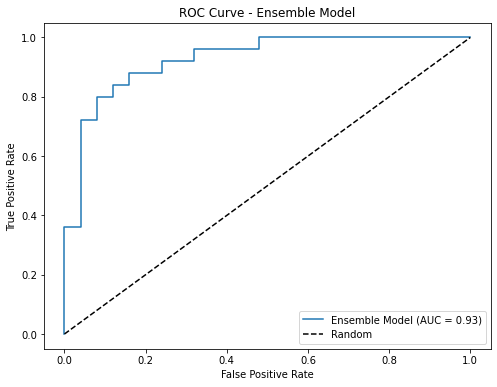


Results for Ensemble Model:
AUC-ROC on testing data: 0.93


In [805]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate individual models
svc_model = SVC(kernel='rbf', probability=True)
logreg_model = LogisticRegression(max_iter=1000)
gnb_model = GaussianNB()

# Create an ensemble of the models using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('svm', svc_model),
        ('logreg', logreg_model),
        ('gnb', gnb_model)
    ],
    voting='soft'  # 'soft' for weighted voting based on probabilities
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_res_train)

# Predictions on validation data
y_val_pred_ensemble = ensemble_model.predict(X_test)

# Accuracy calculation for the ensemble model on validation data
accuracy_val_ensemble = accuracy_score(y_res_test, y_val_pred_ensemble)

# Confusion matrix for validation data for the ensemble model
conf_matrix_val_ensemble = confusion_matrix(y_res_test, y_val_pred_ensemble)

# Classification report for validation data for the ensemble model
class_report_val_ensemble = classification_report(y_res_test, y_val_pred_ensemble)

# Print results for the ensemble model
print("\nResults for Ensemble Model:")
print(f"Accuracy on validation data: {accuracy_val_ensemble:.2%}")

print("\nConfusion Matrix (Validation Data) - Ensemble Model:")
print(conf_matrix_val_ensemble)

print("\nClassification Report (Validation Data) - Ensemble Model:")
print(class_report_val_ensemble)

# Predictions on testing data for the ensemble model
y_test_pred_ensemble = ensemble_model.predict(X_test)

# Accuracy calculation for the ensemble model on testing data
accuracy_test_ensemble = accuracy_score(y_res_test, y_test_pred_ensemble)

# Confusion matrix for testing data for the ensemble model
conf_matrix_test_ensemble = confusion_matrix(y_res_test, y_test_pred_ensemble)

# Classification report for testing data for the ensemble model
class_report_test_ensemble = classification_report(y_res_test, y_test_pred_ensemble)

# Print results for the ensemble model on testing data
print("\nResults for Ensemble Model on Testing Data:")
print(f"Accuracy on testing data: {accuracy_test_ensemble:.2%}")

print("\nConfusion Matrix (Testing Data) - Ensemble Model:")
print(conf_matrix_test_ensemble)

print("\nClassification Report (Testing Data) - Ensemble Model:")
print(class_report_test_ensemble)

# Plot ROC curve for testing data
y_test_pred_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_res_test, y_test_pred_ensemble)
roc_auc_test_ensemble = auc(fpr_ensemble, tpr_ensemble)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble Model (AUC = {roc_auc_test_ensemble:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble Model')
plt.legend(loc='lower right')
plt.show()

# Print AUC-ROC results
print("\nResults for Ensemble Model:")
print(f"AUC-ROC on testing data: {roc_auc_test_ensemble:.2f}")

In [806]:
# Tes dengan input dengan data lain
new_input_data = (85.00, 26.60, 31)  # input variabel Glucose, BMI dan Age
new_input_data_as_numpy_array = np.array(new_input_data)
new_input_data_reshape = new_input_data_as_numpy_array.reshape(1, -1)

# Scaling
std_new_input_data = scaler.transform(new_input_data_reshape)

# Predict
prediction_new_data = ensemble_model.predict(std_new_input_data)

# Print hasil prediksi
if prediction_new_data[0] == 0:
    print('Pasien tidak terkena diabetes')
else:
    print('Pasien terkena diabetes')

Pasien tidak terkena diabetes


In [807]:
# save model
import pickle

filename = 'ensemble_model.sav'
pickle.dump(ensemble_model, open(filename, 'wb'))